In [1]:
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot as plt
import numpy as np
import chess
from chess import pgn
import os

In [2]:
master_data = True
reuse_master_data = False # change after initial data processign
if not master_data:
    df = read_csv('../data/chess.csv') # adjust to use master_data.pgn
    df = df[df['winner']!='draw']
    moves = df['moves'].values[:100]
    # print (moves)
    winner = df['winner'].values


In [3]:
# get a matrix representation given a specific board
def matrix_rep(board): 
    board_epd = board.epd()
    mat = []  
    pieces = board_epd.split(" ", 1)[0]
    rows = pieces.split("/")
    for r in rows:
        sub_mat = []  
        for pic in r:
            if pic.isdigit():
                for i in range(0, int(pic)):
                    sub_mat.append('.')
            else:
                sub_mat.append(pic)
        mat.append(sub_mat)
    return mat


In [4]:
# encode the matrix using some dictionary
def trans_code(matrix,pieces_dict):
    rows = []
    for row in matrix:
        terms = []
        for term in row:
            terms.append(pieces_dict[term])
        rows.append(terms)
    return rows

one_hot_pieces_dict = {
    'p' : [1,0,0,0,0,0,0,0,0,0,0,0],
    'P' : [0,0,0,0,0,0,1,0,0,0,0,0],
    'n' : [0,1,0,0,0,0,0,0,0,0,0,0],
    'N' : [0,0,0,0,0,0,0,1,0,0,0,0],
    'b' : [0,0,1,0,0,0,0,0,0,0,0,0],
    'B' : [0,0,0,0,0,0,0,0,1,0,0,0],
    'r' : [0,0,0,1,0,0,0,0,0,0,0,0],
    'R' : [0,0,0,0,0,0,0,0,0,1,0,0],
    'q' : [0,0,0,0,1,0,0,0,0,0,0,0],
    'Q' : [0,0,0,0,0,0,0,0,0,0,1,0],
    'k' : [0,0,0,0,0,1,0,0,0,0,0,0],
    'K' : [0,0,0,0,0,0,0,0,0,0,0,1],
    '.' : [0,0,0,0,0,0,0,0,0,0,0,0],
}

In [5]:
# set up input and output of the model
if not master_data:
    X = []
    y = []
    for game in moves:
        index = list(moves).index(game)
        all_moves = game.split()
        total_moves = len(all_moves)
        # print (index)
        if winner[index] == 'black':
            game_winner = -1
        else:
            game_winner = 1
        board = chess.Board()
        for i in range(len(all_moves)):
            board.push_san(all_moves[i])
            value = game_winner * (i/total_moves)
            matrix = matrix_rep(board.copy())
            rows = trans_code(matrix,one_hot_pieces_dict)
            X.append([rows])
            y.append(value)
    X = np.array(X).reshape(len(X),8,8,12)
    y = np.array(y)
    X.shape
else:
    if (not reuse_master_data):
        pgn_data = open("../data/twic1356.pgn")
        X = []
        y = []
        num_game = 0
        while (not pgn_data.closed):
            try:
                game = chess.pgn.read_game(pgn_data)
                result = game.headers["Result"][2]
                game_winner = 0
                if result == '0':
                    game_winner = 1 # white win
                if result == '1':
                    game_winner = -1 # black win
                board = chess.Board()
                all_moves = game.mainline_moves()
                total_moves = 150 # change ?
                i = 0
                for move in all_moves:
                    board.push(move)
                    value = game_winner * (i/total_moves) # maybe change to just value = game_winner
                    matrix = matrix_rep(board.copy())
                    rows = trans_code(matrix, one_hot_pieces_dict)
                    X.append([rows])
                    y.append(value)
                    i += 1
            except:
                break
            num_game += 1
            print (num_game)
            # print (np.array(X).shape)
        X = np.array(X).reshape(len(X),8,8,12)
        y = np.array(y)
        # X.shape
        np.save('inputs.npy', X)
        np.save('outputs.npy', y)

    else:
        X = load('inputs.npy')
        y = load('outputs.npy')



989
990
991
992
993
994
995
996
997
998
999
1000
1001
1002
1003
1004
1005
1006
1007
1008
1009
1010
1011
1012
1013
1014
1015
1016
1017
1018
1019
1020
1021
1022
1023
1024
1025
1026
1027
1028
1029
1030
1031
1032
1033
1034
1035
1036
1037
1038
1039
1040
1041
1042
1043
1044
1045
1046
1047
1048
1049
1050
1051
1052
1053
1054
1055
1056
1057
1058
1059
1060
1061
1062
1063
1064
1065
1066
1067
1068
1069
1070
1071
1072
1073
1074
1075
1076
1077
1078
1079
1080
1081
1082
1083
1084
1085
1086
1087
1088
1089
1090
1091
1092
1093
1094
1095
1096
1097
1098
1099
1100
1101
1102
1103
1104
1105
1106
1107
1108
1109
1110
1111
1112
1113
1114
1115
1116
1117
1118
1119
1120
1121
1122
1123
1124
1125
1126
1127
1128
1129
1130
1131
1132
1133
1134
1135
1136
1137
1138
1139
1140
1141
1142
1143
1144
1145
1146
1147
1148
1149
1150
1151
1152
1153
1154
1155
1156
1157
1158
1159
1160
1161
1162
1163
1164
1165
1166
1167
1168
1169
1170
1171
1172
1173
1174
1175
1176
1177
1178
1179
1180
1181
1182
1183
1184
1185
1186
1187
1188
1189
1190


In [10]:
X = np.array(X).reshape(len(X),8,8,12)
y = np.array(y)
x_new = X[7000:]
y_new = y[7000:]
print (X.shape)

(438364, 8, 8, 12)


In [11]:
print (X[0])

[[[0 0 0 1 0 0 0 0 0 0 0 0]
  [0 1 0 0 0 0 0 0 0 0 0 0]
  [0 0 1 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 1 0 0 0 0 0 0 0]
  [0 0 0 0 0 1 0 0 0 0 0 0]
  [0 0 1 0 0 0 0 0 0 0 0 0]
  [0 1 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 1 0 0 0 0 0 0 0 0]]

 [[1 0 0 0 0 0 0 0 0 0 0 0]
  [1 0 0 0 0 0 0 0 0 0 0 0]
  [1 0 0 0 0 0 0 0 0 0 0 0]
  [1 0 0 0 0 0 0 0 0 0 0 0]
  [1 0 0 0 0 0 0 0 0 0 0 0]
  [1 0 0 0 0 0 0 0 0 0 0 0]
  [1 0 0 0 0 0 0 0 0 0 0 0]
  [1 0 0 0 0 0 0 0 0 0 0 0]]

 [[0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0]]

 [[0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0]]

 [[0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0

In [12]:
# CNN model for evaluation function

from keras import callbacks, optimizers
from keras.layers import (LSTM, BatchNormalization, Dense, Dropout, Flatten,
                          TimeDistributed)
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential, load_model, model_from_json
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=1, activation='relu', input_shape=(8,8,12)))
model.add(MaxPooling2D())
model.add(Conv2D(filters=24, kernel_size=1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(filters=10, kernel_size=1, activation='relu'))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(1,activation = 'tanh'))

# print(model.predict(X))

model.compile(optimizer='Nadam', loss='mse')


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 8, 8, 64)          832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4, 4, 24)          1560      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 24)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 10)          250       
_________________________________________________________________
flatten (Flatten)            (None, 40)                0         
_________________________________________________________________
batch_normalization (BatchNo (None, 40)                1

Epoch 1/100
10785/10785 - 33s - loss: 0.1147 - val_loss: 0.1183
Epoch 2/100
10785/10785 - 33s - loss: 0.1107 - val_loss: 0.2059
Epoch 3/100
10785/10785 - 33s - loss: 0.1100 - val_loss: 0.1196
Epoch 4/100
10785/10785 - 33s - loss: 0.1097 - val_loss: 0.1037
Epoch 5/100
10785/10785 - 35s - loss: 0.1094 - val_loss: 0.1104
Epoch 6/100
10785/10785 - 38s - loss: 0.1093 - val_loss: 0.1385
Epoch 7/100
10785/10785 - 33s - loss: 0.1091 - val_loss: 0.1031
Epoch 8/100
10785/10785 - 34s - loss: 0.1090 - val_loss: 0.1085
Epoch 9/100
10785/10785 - 34s - loss: 0.1088 - val_loss: 0.1073
Epoch 10/100
10785/10785 - 35s - loss: 0.1087 - val_loss: 0.1038
Epoch 11/100
10785/10785 - 34s - loss: 0.1086 - val_loss: 0.1102
Epoch 12/100
10785/10785 - 33s - loss: 0.1086 - val_loss: 0.1110
Epoch 13/100
10785/10785 - 34s - loss: 0.1085 - val_loss: 0.1019
Epoch 14/100
10785/10785 - 33s - loss: 0.1084 - val_loss: 0.1607
Epoch 15/100
10785/10785 - 33s - loss: 0.1083 - val_loss: 0.1817
Epoch 16/100
10785/10785 - 35s - l

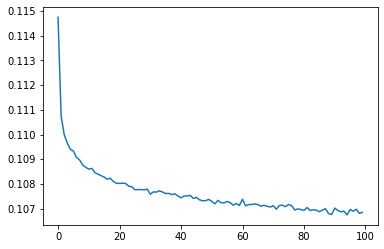

In [14]:
reuse = True
from keras import models
if (reuse):
    model = models.load_model("../storage/chess_model.h5")

history = model.fit(x_new,y_new,epochs = 100,verbose = 2, validation_split = 0.2)
plt.plot(history.history['loss'])

In [17]:
from keras.models import load_model, save_model
save_model(model, "../storage/chess_model.h5")

In [18]:
os.chdir("../storage")
from keras import models
loaded_model = models.load_model("chess_model.h5")